In [52]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.io import loadmat

def load_data(file_name):
    mat_data = loadmat(f'dataLDA/{file_name}.mat')

    x_array = mat_data['X']
    y_array = mat_data['Y']

    x_numpy_array = np.array(x_array)
    y_numpy_array = np.array(y_array)
    return x_numpy_array, y_numpy_array

def load_data_5d(file_name, x_key, y_key):
    mat_data = loadmat(f'dataLDA/{file_name}.mat')

    x_array = mat_data[x_key]
    y_array = mat_data[y_key]

    x_numpy_array = np.array(x_array)
    y_numpy_array = np.array(y_array)
    return x_numpy_array, y_numpy_array

def calc_x_tilde(training_x):
    new_row = np.ones((1, training_x.shape[1]), dtype=int)
    new_matrix = np.insert(training_x, 0, new_row, axis=0)
    return new_matrix

def calc_minus_l(training_x_tilde, training_y,theta):
    n=training_y.shape[1]
    l = 0
    for i in range(n):
        l += training_y[0,i]*np.dot(theta,training_x_tilde[:,i])-np.log(1+np.exp(-np.dot(theta,training_x_tilde[:,i])))
    return -l

def calc_gradient(training_x_tilde, training_y,theta):
    n=training_y.shape[1]
    gradient=0
    for i in range(n):
        gradient += training_x_tilde[:,i]*(training_y[0,i]-(1/(1+np.exp(-np.dot(theta,training_x_tilde[:,i])))))
    return -gradient

def calc_gradient_decent(training_x_tilde,training_y,alpha,theta,epsilon,iteration_max):
    l_history = np.zeros(iteration_max)
    delta_l_history =np.zeros(iteration_max)
    number = 0
    for i in range(iteration_max):
        l = calc_minus_l(training_x_tilde, training_y,theta)
        l_history[i] = l
        gradient = calc_gradient(training_x_tilde, training_y,theta)
        delta_l_history[i]=np.linalg.norm(gradient)
        if(np.linalg.norm(gradient)<epsilon):
            return l_history, theta,delta_l_history,i
        theta = theta - alpha*gradient
        number = i

    return l_history, theta,delta_l_history,number

def Gradient_Descent_classifier(theta,testing_x):
    testing_x_tilde=np.insert(testing_x, 0, 1)
    value = np.dot(theta,testing_x_tilde)
    if (value>=0):
        return 1
    else:
        return 0

def Gradient_Descent_classifier_function(theta,x):
    return -theta[0]/theta[2]-theta[1]*x/theta[2]

def calc_Hessian(training_x,theta):
    training_x_tilde = calc_x_tilde(training_x)
    n  = training_x_tilde.shape[1]
    d  = training_x_tilde.shape[0]
    hessian = np.zeros((d,d))
    for i in range(n):
        x_i = training_x_tilde[:,i]
        # hessian -= x_i@x_i.T*(1/(1+np.exp(-np.dot(theta,x_i))))*(1-1/(1+np.exp(-np.dot(theta,x_i))))
        hessian += np.outer(x_i,x_i.T)*(1/(1+np.exp(-np.dot(theta,x_i))))*(np.exp(-1*np.dot(theta,x_i))/(1+np.exp(-1*np.dot(theta,x_i))))
    return hessian

def newton_theta_j_plus1(theta_j,hessian,gradient):
    theta_j_plus1 = theta_j - np.linalg.inv(hessian)@gradient
    return theta_j_plus1

def calc_newton(training_x,training_y,theta,iteration_max):
    training_x_tilde  = calc_x_tilde(training_x)
    l_history = np.zeros(iteration_max)
    delta_l_history =np.zeros(iteration_max)
    number = 0
    for i in range(iteration_max):
        l = calc_minus_l(training_x_tilde, training_y,theta)
        l_history[i] = l
        gradient = calc_gradient(training_x_tilde, training_y,theta)
        delta_l_history[i]=np.linalg.norm(gradient)
        if(np.linalg.norm(gradient)<epsilon):
            return l_history, theta,delta_l_history,i
        hessian = calc_Hessian(training_x,theta)
        theta = newton_theta_j_plus1(theta,hessian,gradient)
        number = i
    return l_history, theta,delta_l_history,number

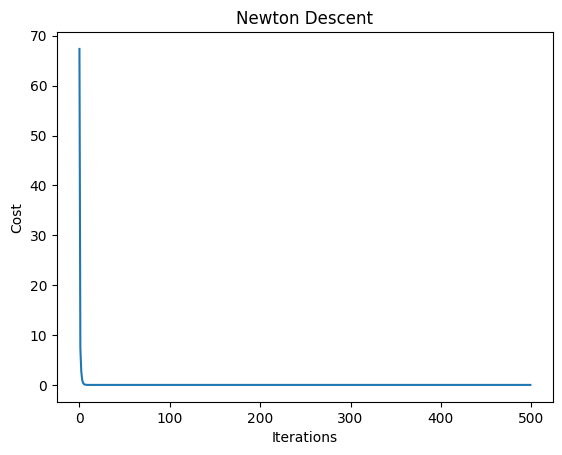

theta =  [-17.64083638  17.1465243   25.13341941]
iteration_time =  9


In [53]:
file_name = 'synthetic1'
training_x, training_y = load_data(file_name)
d = training_x.shape[0]
n = training_x.shape[1]
theta = np.ones(d+1)
epsilon = 0.01
iteration_max = 500
training_x_tilde = calc_x_tilde(training_x)

l_history, theta ,delta_l_history,iteration_time= calc_newton(training_x,training_y,theta,iteration_max)

# training_y_hat = np.zeros(n)
# for i in range(n):
#     training_y_hat[i] = Gradient_Descent_classifier(theta,training_x[:,i])
#
# risk = np.sum(training_y_hat != training_y[0,:])/n
# print('risk:',risk)
plt.plot(range(iteration_max), delta_l_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Newton Descent')
plt.show()
print('theta = ',theta)
print('iteration_time = ',iteration_time)
# print('l_history=',l_history)
# print(delta_l_history)
#
# print(training_y_hat)
# print(training_y)

__header__
__version__
__globals__
X
Y


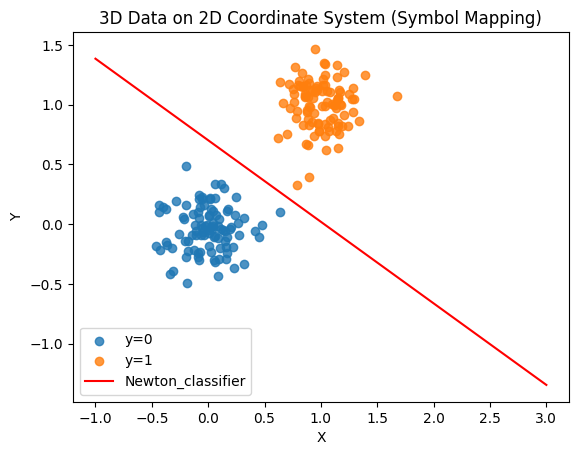

In [54]:
from scipy.io import loadmat
import numpy as np

# Load the MATLAB file
mat_data = loadmat('dataLDA/synthetic1.mat')

# Access variables in the MATLAB file
# The variables are stored as keys in the dictionary
for key in mat_data:
   print(key)   # Print the variable names

# Access a specific variable from the MATLAB file
x_array = mat_data['X']
y_array = mat_data['Y']

# Convert the MATLAB variable to a NumPy array
x_numpy_array = np.array(x_array)
y_numpy_array = np.array(y_array)

# Perform some operations on the array
mean_value = np.mean(y_numpy_array)
max_value = np.max(y_numpy_array)

# Prepare coordinate data
x0 = x_numpy_array[0]
x1 = x_numpy_array[1]
y = y_numpy_array[0]

for i in range(2):
    plt.scatter(x0[y == i], x1[y == i], label=f'y={i}', alpha=0.8)
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('3D Data on 2D Coordinate System (Symbol Mapping)')
# plt.show()

x_value=np.linspace(-1,3,500);
g1_value=[Gradient_Descent_classifier_function(theta,x) for x in x_value]
plt.plot(x_value,g1_value,label='Newton_classifier',color='r');
plt.legend()
plt.show()

## Data2

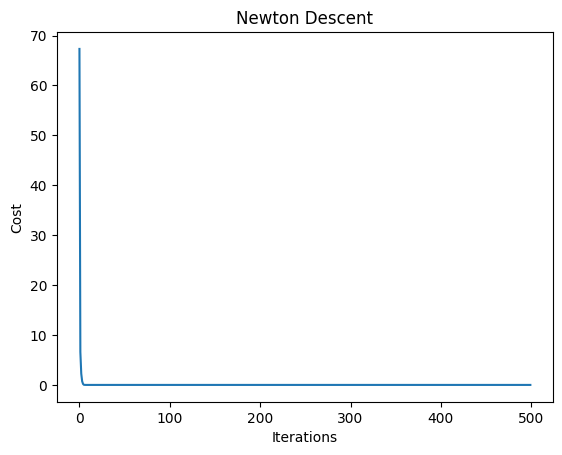

theta =  [-5.20549538  0.44454124 10.75931079]
iteration_time =  6
__header__
__version__
__globals__
X
Y
w
b


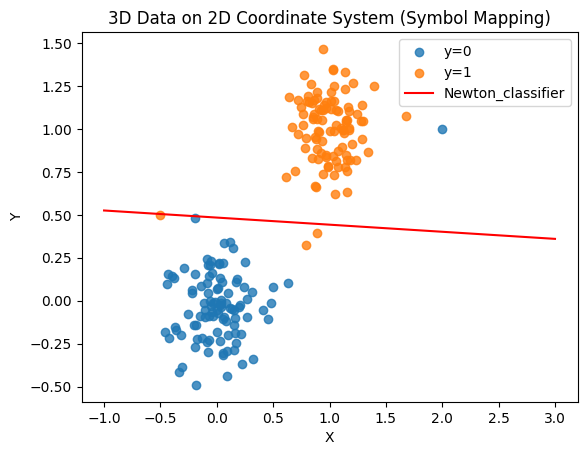

In [55]:
file_name = 'synthetic2'
training_x, training_y = load_data(file_name)
d = training_x.shape[0]
n = training_x.shape[1]
theta = np.ones(d+1)
epsilon = 0.01
iteration_max = 500
training_x_tilde = calc_x_tilde(training_x)

l_history, theta ,delta_l_history,iteration_time= calc_newton(training_x,training_y,theta,iteration_max)

# training_y_hat = np.zeros(n)
# for i in range(n):
#     training_y_hat[i] = Gradient_Descent_classifier(theta,training_x[:,i])
#
# risk = np.sum(training_y_hat != training_y[0,:])/n
# print('risk:',risk)
plt.plot(range(iteration_max), delta_l_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Newton Descent')
plt.show()
print('theta = ',theta)
print('iteration_time = ',iteration_time)
mat_data = loadmat('dataLDA/synthetic2.mat')

# Access variables in the MATLAB file
# The variables are stored as keys in the dictionary
for key in mat_data:
   print(key)   # Print the variable names

# Access a specific variable from the MATLAB file
x_array = mat_data['X']
y_array = mat_data['Y']

# Convert the MATLAB variable to a NumPy array
x_numpy_array = np.array(x_array)
y_numpy_array = np.array(y_array)

# Perform some operations on the array
mean_value = np.mean(y_numpy_array)
max_value = np.max(y_numpy_array)

# Prepare coordinate data
x0 = x_numpy_array[0]
x1 = x_numpy_array[1]
y = y_numpy_array[0]

for i in range(2):
    plt.scatter(x0[y == i], x1[y == i], label=f'y={i}', alpha=0.8)
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('3D Data on 2D Coordinate System (Symbol Mapping)')
# plt.show()

x_value=np.linspace(-1,3,500);
g1_value=[Gradient_Descent_classifier_function(theta,x) for x in x_value]
plt.plot(x_value,g1_value,label='Newton_classifier',color='r');
plt.legend()
plt.show()

## Data3

C:\Users\86135\AppData\Local\Temp\ipykernel_26168\1771407268.py:35: RuntimeWarning: overflow encountered in exp
  l += training_y[0,i]*np.dot(theta,training_x_tilde[:,i])-np.log(1+np.exp(-np.dot(theta,training_x_tilde[:,i])))
C:\Users\86135\AppData\Local\Temp\ipykernel_26168\1771407268.py:42: RuntimeWarning: overflow encountered in exp
  gradient += training_x_tilde[:,i]*(training_y[0,i]-(1/(1+np.exp(-np.dot(theta,training_x_tilde[:,i])))))
C:\Users\86135\AppData\Local\Temp\ipykernel_26168\1771407268.py:80: RuntimeWarning: overflow encountered in exp
  hessian += np.outer(x_i,x_i.T)*(1/(1+np.exp(-np.dot(theta,x_i))))*(np.exp(-1*np.dot(theta,x_i))/(1+np.exp(-1*np.dot(theta,x_i))))
C:\Users\86135\AppData\Local\Temp\ipykernel_26168\1771407268.py:80: RuntimeWarning: invalid value encountered in scalar divide
  hessian += np.outer(x_i,x_i.T)*(1/(1+np.exp(-np.dot(theta,x_i))))*(np.exp(-1*np.dot(theta,x_i))/(1+np.exp(-1*np.dot(theta,x_i))))


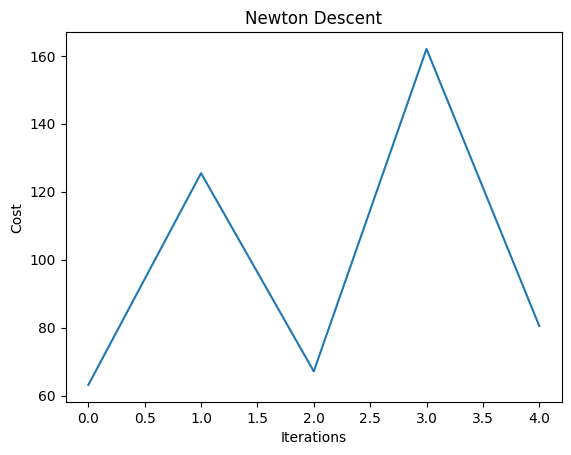

theta =  [nan nan nan]
iteration_time =  499
__header__
__version__
__globals__
X
Y


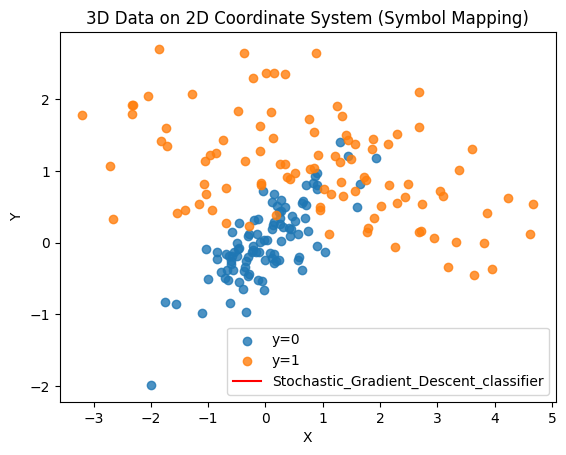

In [56]:
file_name = 'synthetic3'
training_x, training_y = load_data(file_name)
d = training_x.shape[0]
n = training_x.shape[1]
theta = np.ones(d+1)
epsilon = 0.01
iteration_max = 500
training_x_tilde = calc_x_tilde(training_x)

l_history, theta ,delta_l_history,iteration_time= calc_newton(training_x,training_y,theta,iteration_max)

# training_y_hat = np.zeros(n)
# for i in range(n):
#     training_y_hat[i] = Gradient_Descent_classifier(theta,training_x[:,i])
#
# risk = np.sum(training_y_hat != training_y[0,:])/n
# print('risk:',risk)
plt.plot(range(iteration_max), delta_l_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Newton Descent')
plt.show()
print('theta = ',theta)
print('iteration_time = ',iteration_time)
mat_data = loadmat('dataLDA/synthetic3.mat')

# Access variables in the MATLAB file
# The variables are stored as keys in the dictionary
for key in mat_data:
   print(key)   # Print the variable names

# Access a specific variable from the MATLAB file
x_array = mat_data['X']
y_array = mat_data['Y']

# Convert the MATLAB variable to a NumPy array
x_numpy_array = np.array(x_array)
y_numpy_array = np.array(y_array)

# Perform some operations on the array
mean_value = np.mean(y_numpy_array)
max_value = np.max(y_numpy_array)

# Prepare coordinate data
x0 = x_numpy_array[0]
x1 = x_numpy_array[1]
y = y_numpy_array[0]

for i in range(2):
    plt.scatter(x0[y == i], x1[y == i], label=f'y={i}', alpha=0.8)
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('3D Data on 2D Coordinate System (Symbol Mapping)')
# plt.show()

x_value=np.linspace(-1,3,500);
g1_value=[Gradient_Descent_classifier_function(theta,x) for x in x_value]
plt.plot(x_value,g1_value,label='Stochastic_Gradient_Descent_classifier',color='r');
plt.legend()
plt.show()